In [1]:
import numpy as np
import pandas as pd

In [2]:
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions

In [3]:
from preprocess import getdfs

train_df, valid_df = getdfs(data = 'text_seq')

In [4]:
train_df.head()

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


In [5]:
from preprocess import process_strings

train_df['input_str'] = process_strings(train_df['input_str'])
valid_df['input_str'] = process_strings(valid_df['input_str'])


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(analyzer='char')

# Fit and transform the data
x_train = vectorizer.fit_transform(train_df["input_str"])
x_valid = vectorizer.transform(valid_df["input_str"])
y_train = train_df["label"]
y_valid = valid_df["label"]

In [7]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions

In [8]:
x_train

<7080x10 sparse matrix of type '<class 'numpy.float64'>'
	with 52663 stored elements in Compressed Sparse Row format>

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.52      0.56      0.54       252
     Class 1       0.49      0.45      0.47       237

    accuracy                           0.51       489
   macro avg       0.51      0.51      0.50       489
weighted avg       0.51      0.51      0.51       489

Accuracy is 0.5071574642126789
==========Random Forest==========
==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.50      0.52      0.51       252
     Class 1       0.47      0.46      0.46       237

    accuracy                           0.49       489
   macro avg       0.49      0.49      0.49       489
weighted avg       0.49      0.49      0.49       489

Accuracy is 0.4887525562372188
==========XGBoost==========
==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.49      0.53      0.51       252
     Class 

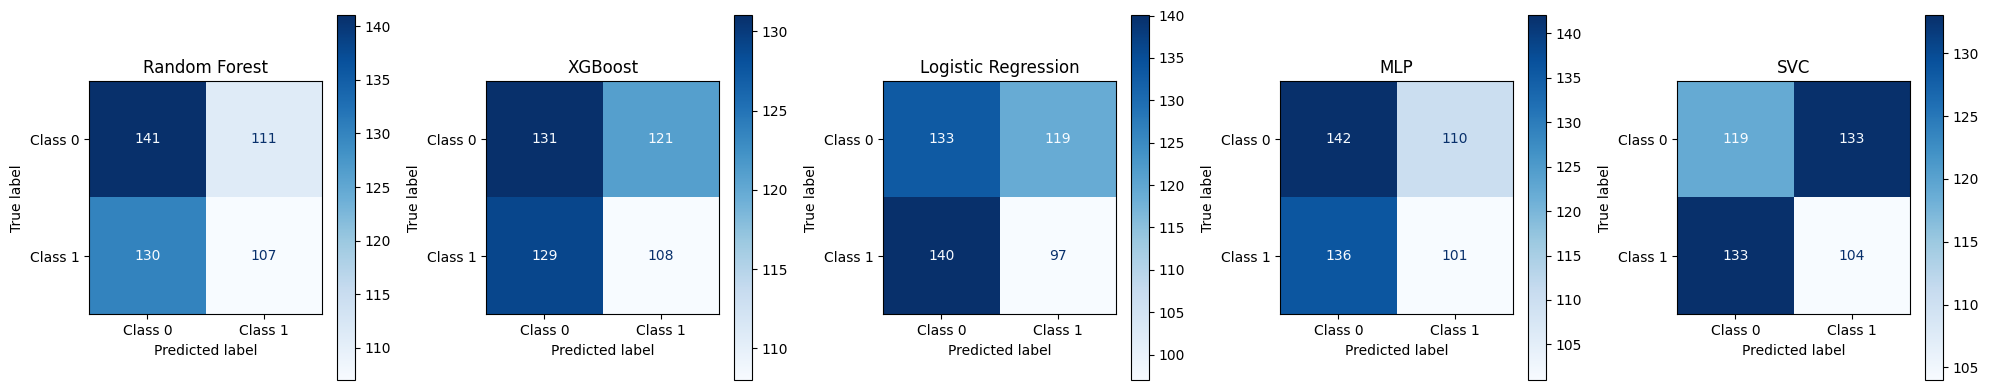

In [9]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])

plt.tight_layout()
plt.show()